In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Data Cleaning

In [4]:
df =pd.DataFrame(pd.read_csv('../csv selection/FINAL_clean_sales_dataset.csv',
                             low_memory=False))

In [5]:
df.drop(['source', 'facades_number'], axis=1, inplace=True)

In [6]:
df[['house_is', 'equipped_kitchen_has','furnished','open_fire','terrace','garden','swimming_pool_has']]=df[['house_is', 'equipped_kitchen_has','furnished','open_fire','terrace','garden','swimming_pool_has']].astype('int')

In [7]:
def dummy(col, df):
    col_enc = pd.get_dummies(df[col])
    
    df = pd.concat([df, col_enc], axis=1)
    
    df.drop([col], axis=1, inplace=True)
    
    return df

In [8]:
df = dummy('property_subtype', df)

In [9]:
df = dummy('region', df)

In [10]:
df = dummy('building_state_agg', df)

In [11]:
df.head()

,postcode,house_is,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,terrace_area,...,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA,B,F,W,good,renovated,to_renovate
0,4180,1,295000.0,3.0,242.0,1,0,0,1,36.0,...,0,0,0,0,0,0,1,1,0,0
1,8730,1,675000.0,4.0,349.0,1,0,0,0,0.0,...,0,0,0,1,0,1,0,1,0,0
2,4020,1,250000.0,5.0,303.0,1,0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,1
3,1200,1,545000.0,4.0,235.0,1,1,0,0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,1190,1,500000.0,2.0,220.0,1,0,0,0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [12]:
df.drop_duplicates()


,postcode,house_is,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,terrace_area,...,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA,B,F,W,good,renovated,to_renovate
0,4180,1,295000.0,3.0,242.0,1,0,0,1,36.0,...,0,0,0,0,0,0,1,1,0,0
1,8730,1,675000.0,4.0,349.0,1,0,0,0,0.0,...,0,0,0,1,0,1,0,1,0,0
2,4020,1,250000.0,5.0,303.0,1,0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,1
3,1200,1,545000.0,4.0,235.0,1,1,0,0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,1190,1,500000.0,2.0,220.0,1,0,0,0,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11283,8790,0,250000.0,1.0,300.0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,1,0,0
11284,2018,0,298000.0,1.0,71.0,1,0,0,1,12.0,...,0,0,0,0,0,1,0,1,0,0
11285,2610,0,1500000.0,10.0,520.0,1,0,0,0,0.0,...,0,0,0,0,0,1,0,1,0,0
11286,2000,0,150000.0,1.0,40.0,1,0,0,0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [13]:
df.to_csv("Data_for_Regression_m.csv", index=False)

# Data Inspection

In [14]:
df.shape

(11288, 43)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11288 entries, 0 to 11287
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   postcode              11288 non-null  int64  
 1   house_is              11288 non-null  int64  
 2   price                 11288 non-null  float64
 3   rooms_number          11288 non-null  float64
 4   area                  11288 non-null  float64
 5   equipped_kitchen_has  11288 non-null  int64  
 6   furnished             11288 non-null  int64  
 7   open_fire             11288 non-null  int64  
 8   terrace               11288 non-null  int64  
 9   terrace_area          11288 non-null  float64
 10  garden                11288 non-null  int64  
 11  garden_area           11288 non-null  float64
 12  land_surface          11288 non-null  float64
 13  swimming_pool_has     11288 non-null  int64  
 14  APARTMENT             11288 non-null  uint8  
 15  APARTMENT_BLOCK    

In [16]:
df.describe()

,postcode,house_is,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,terrace_area,...,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA,B,F,W,good,renovated,to_renovate
count,11288.000000,11288.000000,1.128800e+04,11288.000000,11288.000000,11288.000000,11288.000000,11288.000000,11288.000000,11288.000000,...,11288.000000,11288.000000,11288.000000,11288.000000,11288.000000,11288.000000,11288.000000,11288.000000,11288.000000,11288.000000
mean,4857.760454,0.537562,4.927968e+05,3.199947,195.134036,0.836641,0.037296,0.064670,0.671775,12.608965,...,0.006733,0.006467,0.002481,0.069720,0.193746,0.494773,0.311481,0.752303,0.072023,0.175673
std,3181.093932,0.498609,5.676955e+05,3.786751,219.598588,0.369710,0.189495,0.245954,0.469588,28.274838,...,0.081781,0.080161,0.049745,0.254686,0.395249,0.499995,0.463119,0.431694,0.258538,0.380559
min,1000.000000,0.000000,2.500000e+04,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1420.000000,0.000000,2.250000e+05,2.000000,97.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4420.000000,1.000000,3.290000e+05,3.000000,146.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8300.000000,1.000000,5.300000e+05,4.000000,227.000000,1.000000,0.000000,0.000000,1.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,9992.000000,1.000000,1.500000e+07,204.000000,9250.000000,1.000000,1.000000,1.000000,1.000000,708.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

postcode                0.0
house_is                0.0
price                   0.0
rooms_number            0.0
area                    0.0
equipped_kitchen_has    0.0
furnished               0.0
open_fire               0.0
terrace                 0.0
terrace_area            0.0
garden                  0.0
garden_area             0.0
land_surface            0.0
swimming_pool_has       0.0
APARTMENT               0.0
APARTMENT_BLOCK         0.0
BUNGALOW                0.0
CASTLE                  0.0
CHALET                  0.0
COUNTRY_COTTAGE         0.0
DUPLEX                  0.0
EXCEPTIONAL_PROPERTY    0.0
FARMHOUSE               0.0
FLAT_STUDIO             0.0
GROUND_FLOOR            0.0
HOUSE                   0.0
KOT                     0.0
LOFT                    0.0
MANOR_HOUSE             0.0
MANSION                 0.0
MIXED_USE_BUILDING      0.0
OTHER_PROPERTY          0.0
PENTHOUSE               0.0
SERVICE_FLAT            0.0
TOWN_HOUSE              0.0
TRIPLEX             

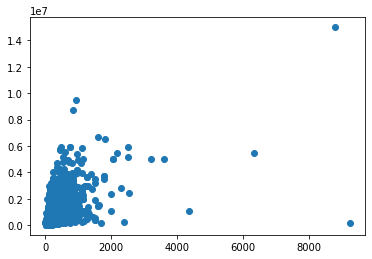

In [18]:
plt.scatter(df.area,df.price)

In [19]:
df = df[df.area < 4000]
df.sort_values(by='area', ascending=False)

,postcode,house_is,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,terrace_area,...,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA,B,F,W,good,renovated,to_renovate
1750,7760,1,5000000.0,90.0,3600.0,0,0,0,0,0.0,...,0,0,0,0,0,0,1,1,0,0
1108,7340,1,5000000.0,65.0,3200.0,1,0,0,1,0.0,...,0,0,0,0,0,0,1,0,1,0
682,4800,1,2450000.0,71.0,2540.0,1,0,0,0,0.0,...,0,0,0,0,0,0,1,1,0,0
1748,1030,1,5929000.0,14.0,2500.0,0,0,0,0,0.0,...,0,0,0,0,1,0,0,1,0,0
1747,1190,1,5200000.0,20.0,2500.0,0,0,0,0,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,3001,0,146000.0,1.0,16.0,0,1,0,0,0.0,...,0,0,0,0,0,1,0,0,1,0
10032,3000,0,179000.0,1.0,15.0,0,1,0,0,0.0,...,0,0,0,0,0,1,0,1,0,0
8146,9000,0,115000.0,0.0,15.0,1,1,0,0,0.0,...,0,0,0,0,0,1,0,1,0,0
5903,8954,1,265500.0,3.0,5.0,1,0,0,0,0.0,...,0,0,0,0,0,1,0,1,0,0


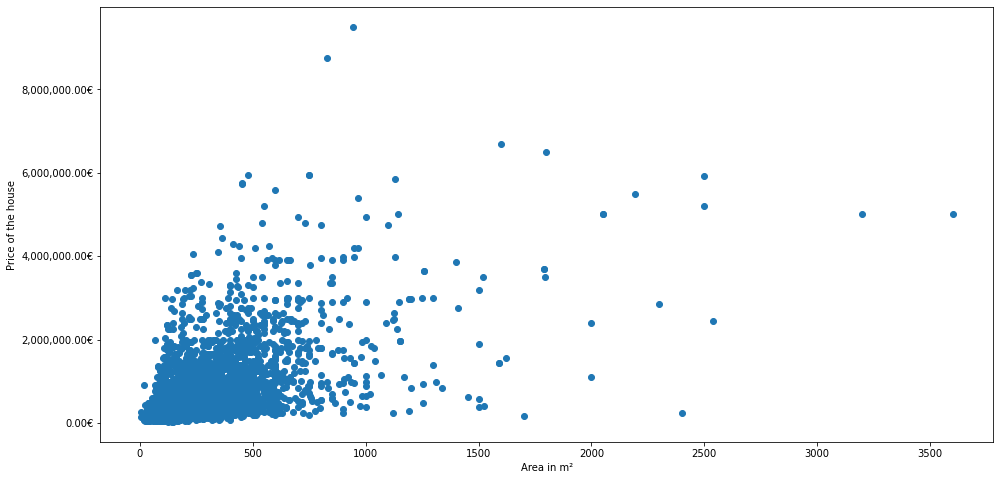

In [20]:

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df.area,df.price)
ax.set_xlabel('Area in m²')
ax.set_ylabel('Price of the house')
fmt = '{x:,.2f}€'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.show()

In [21]:
for column in df.columns :
    
    result = df[column].value_counts(normalize=True)
    if result.shape[0] < 3:
        print(result)

1    0.537487
0    0.462513
Name: house_is, dtype: float64
1    0.836671
0    0.163329
Name: equipped_kitchen_has, dtype: float64
0    0.962691
1    0.037309
Name: furnished, dtype: float64
0    0.935307
1    0.064693
Name: open_fire, dtype: float64
1    0.671836
0    0.328164
Name: terrace, dtype: float64
0    0.778625
1    0.221375
Name: garden, dtype: float64
0    0.967742
1    0.032258
Name: swimming_pool_has, dtype: float64
0    0.659163
1    0.340837
Name: APARTMENT, dtype: float64
0    0.939738
1    0.060262
Name: APARTMENT_BLOCK, dtype: float64
0    0.996189
1    0.003811
Name: BUNGALOW, dtype: float64
0    0.999202
1    0.000798
Name: CASTLE, dtype: float64
0    0.999557
1    0.000443
Name: CHALET, dtype: float64
0    0.995392
1    0.004608
Name: COUNTRY_COTTAGE, dtype: float64
0    0.965438
1    0.034562
Name: DUPLEX, dtype: float64
0    0.986441
1    0.013559
Name: EXCEPTIONAL_PROPERTY, dtype: float64
0    0.997784
1    0.002216
Name: FARMHOUSE, dtype: float64
0    0.982099


In [22]:
delete_col = ['furnished','open_fire','swimming_pool_has', 'APARTMENT', 'APARTMENT_BLOCK','BUNGALOW','CASTLE', 'CHALET', 'COUNTRY_COTTAGE', 'DUPLEX', 'EXCEPTIONAL_PROPERTY',      'FARMHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR', 'HOUSE', 'KOT', 'LOFT','MANOR_HOUSE', 'MANSION', 'MIXED_USE_BUILDING', 'OTHER_PROPERTY','PENTHOUSE', 'SERVICE_FLAT', 'TOWN_HOUSE', 'TRIPLEX', 'VILLA',]

In [23]:
df.columns

Index(['postcode', 'house_is', 'price', 'rooms_number', 'area',
       'equipped_kitchen_has', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'land_surface',
       'swimming_pool_has', 'APARTMENT', 'APARTMENT_BLOCK', 'BUNGALOW',
       'CASTLE', 'CHALET', 'COUNTRY_COTTAGE', 'DUPLEX', 'EXCEPTIONAL_PROPERTY',
       'FARMHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR', 'HOUSE', 'KOT', 'LOFT',
       'MANOR_HOUSE', 'MANSION', 'MIXED_USE_BUILDING', 'OTHER_PROPERTY',
       'PENTHOUSE', 'SERVICE_FLAT', 'TOWN_HOUSE', 'TRIPLEX', 'VILLA', 'B', 'F',
       'W', 'good', 'renovated', 'to_renovate'],
      dtype='object')

In [24]:
df = df.drop(delete_col, axis=1)
df

,postcode,house_is,price,rooms_number,area,equipped_kitchen_has,terrace,terrace_area,garden,garden_area,land_surface,B,F,W,good,renovated,to_renovate
0,4180,1,295000.0,3.0,242.0,1,1,36.0,1,1000.0,1403.0,0,0,1,1,0,0
1,8730,1,675000.0,4.0,349.0,1,0,0.0,1,977.0,1526.0,0,1,0,1,0,0
2,4020,1,250000.0,5.0,303.0,1,0,0.0,0,0.0,760.0,0,0,1,0,0,1
3,1200,1,545000.0,4.0,235.0,1,0,0.0,0,0.0,63.0,1,0,0,0,1,0
4,1190,1,500000.0,2.0,220.0,1,0,0.0,1,60.0,193.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11283,8790,0,250000.0,1.0,300.0,0,0,0.0,0,0.0,0.0,0,1,0,1,0,0
11284,2018,0,298000.0,1.0,71.0,1,1,12.0,0,0.0,0.0,0,1,0,1,0,0
11285,2610,0,1500000.0,10.0,520.0,1,0,0.0,1,72.0,0.0,0,1,0,1,0,0
11286,2000,0,150000.0,1.0,40.0,1,0,0.0,0,0.0,0.0,0,1,0,0,0,1
